In [17]:
# pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [18]:
import numpy as np
import pandas as pd
import sys
import gc
import joblib
import pathlib
import json
import glob
from tqdm.notebook import tqdm

# visualize
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
from matplotlib import pyplot
from matplotlib.ticker import ScalarFormatter
sns.set_context("talk")
style.use('seaborn-colorblind')

import plotly.graph_objects as go

In [19]:
df = pd.read_csv("/Users/sandeep/Downloads/DOGE-USD.csv")
df.head()

,Date,Open,High,Low,Close,Volume
0,2017-11-09,0.001207,0.001415,0.001181,0.001415,6259550
1,2017-11-10,0.001421,0.001431,0.001125,0.001163,4246520
2,2017-11-11,0.001146,0.001257,0.001141,0.001201,2231080
3,2017-11-12,0.001189,0.001210,0.001002,0.001038,3288960
4,2017-11-13,0.001046,0.001212,0.001019,0.001211,2481270


In [20]:
# Add day of the week so we can start to see weekly patterns
df['dayofweek'] = pd.to_datetime(df['Date']).dt.dayofweek
df['dayofweek'].value_counts()

6    219
5    219
4    219
3    219
1    219
0    219
2    218
Name: dayofweek, dtype: int64

<AxesSubplot:xlabel='dayofweek', ylabel='intraday'>

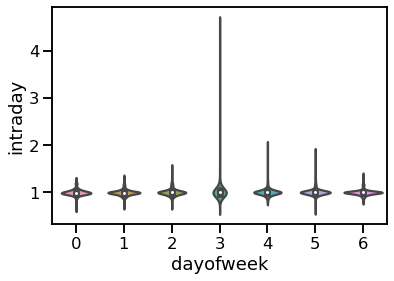

In [21]:
df['intraday'] = df['Close'] / df['Open']
sns.violinplot(x='dayofweek', y='intraday', data=df)

In [22]:
df.head()

,Date,Open,High,Low,Close,Volume,dayofweek,intraday
0,2017-11-09,0.001207,0.001415,0.001181,0.001415,6259550,3,1.172328
1,2017-11-10,0.001421,0.001431,0.001125,0.001163,4246520,4,0.818438
2,2017-11-11,0.001146,0.001257,0.001141,0.001201,2231080,5,1.047993
3,2017-11-12,0.001189,0.001210,0.001002,0.001038,3288960,6,0.873003
4,2017-11-13,0.001046,0.001212,0.001019,0.001211,2481270,0,1.157744


In [23]:
import plotly.express as px
# plotting violins to see the spread of intraday changes on each day
fig = px.violin(df, y="intraday", x='dayofweek')
fig.show()

In [27]:
# plotting violins to see the spread of intraday changes on each day with a different library
fig = go.Figure(data=go.Violin(y=df['intraday'], x=df['dayofweek'], box_visible=True, line_color='black',
                               meanline_visible=True, fillcolor='lightseagreen', opacity=0.6,
                               ))
fig.show()
                            

Its not immediately clear the price trends, mostly because of some outliers, so I will clean the dataset of outliers, specifically the one on wednesday, and recreate the violin plots.